# Data Visualization in Python

## Objectives 

* Identify data visualization as a necessary tool for data scientists
* Select suitable visual cues for given context
* Rank different cues based on their effectiveness.

## Background

Data Visualization involves technology and skills by which humans communicate and understand complex analytics by  recognizing visual cues and patterns. As data complexity increases, the complexity of analytical process around it also increases,  making it very challenging to effectively communicate the findings. This makes visualization of data even more critical in real world contexts. Data visualization is thus considered to be a skill of very high importance for a data scientist's career. Upcoming set of lessons and labs will help you understand basic data visualization principles and explain some terminology related to data visualization. We shall mainly use python's `matplotlib` and `seaborn` libraries to visualize different datasets in a multitude of contexts.   

![](https://3c1703fe8d.site.internapcdn.net/newman/gfx/news/hires/2013/whatmakesada.png)

## Why Visualize?


Let’s say we want to analyze the click stream data from our on-line customers' visits to our company's website. We have data about how many times they have logged in, how many pages and links and they visited and how much revenue we have earned from them etc. We can immediately calculate several compelling summary statistic as: 

* What is the average number of visits per visitor? 
* What is the average revenue per visitor?
* What are top ten popular products based on total number of purchase clicks by visitors. 
* What is the correlation between total number of visits and revenue earned?

This sounds pretty reasonable. Summary statistics allow us to describe a complex dataset using just a few key measures, providing an easy way to develop and optimize  your business strategy by using statistical measures a key performance indicators. But there is a danger in relying only on summary statistics and ignoring the **overall distribution**. 

Let's take a look at how summary statistics can be misleading in absence of suitable visualizations by using the famous Anscombe's Quartet as an example. 

### Anscombe's Quartet

Perhaps the most elegant demonstration of the dangers of using summary statistics in absence of suitable visualizations is **Anscombe’s Quartet**. In a 1973 paper, **Graphs in Statistical Analysis**, published in The American Statisticians, Francis Anscombe provided this example with the briefest of abstracts: *"Graphs are essential to good statistical analysis".* 

>**Anscombe's Quartet a group of four datasets (sets I, II, II, IV with an x and y value each) that appear to be similar when using typical summary statistics, yet tell four different stories when visualized.**

Let's import `matplotlib` (a plotting library in python) and look at these datasets as shown below:

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
plt.style.use('ggplot')
from scipy.stats import linregress
import numpy as np

x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

We shall first calculate basic summary statistics from above data. 

In [2]:
# Get the mean for all xs
for i, x in enumerate([x1,x2,x3,x4]):
    print ('Mean of values in', 'x'+(str(i+1)), ':', round(np.mean(x)))
print('\n')

# Get the mean for all ys    
for y in [y1,y2,y3,y4]:
    print ('Mean of values in', 'y'+(str(i+1)), ':', round(np.mean(y),2))

Mean of values in x1 : 9.0
Mean of values in x2 : 9.0
Mean of values in x3 : 9.0
Mean of values in x4 : 9.0


Mean of values in y4 : 7.5
Mean of values in y4 : 7.5
Mean of values in y4 : 7.5
Mean of values in y4 : 7.5


The average x value is 9 for each dataset.

The average y value is 7.50 for each dataset.

This means statistically speaking, the center of all x and y variables in four datasets have same value. So one would would conclude they are pretty similar . But are they ?

Let's calculate standard deviation as a measure of spread of data for our xs and ys.

In [3]:
# Get the standard deviation for all xs
for i, x in enumerate([x1,x2,x3,x4]):
    print ('Standard Deviation of values in', 'x'+(str(i+1)), ':', round(np.std(x),2))
print('\n')

# Get the standard deviation for all ys
for y in [y1,y2,y3,y4]:
    print ('Standard Deviation of values in', 'y'+(str(i+1)), ':', round(np.std(y),2))

Standard Deviation of values in x1 : 3.16
Standard Deviation of values in x2 : 3.16
Standard Deviation of values in x3 : 3.16
Standard Deviation of values in x4 : 3.16


Standard Deviation of values in y4 : 1.94
Standard Deviation of values in y4 : 1.94
Standard Deviation of values in y4 : 1.94
Standard Deviation of values in y4 : 1.94


The variance for xs is 3.16 and the variance for ys is 1.92.

Again, our summary statistics tell us that given all xs and ys have similar measures of center and spread, the datasets must be highly similar, if not totally similar.

As another statistical measure, we can consider identifying the measure of similarity between xs and ys for each dataset. 

In [106]:
for i,xy in enumerate([(x1,y1),(x2,y2),(x3,y3),(x4,y4)]):
    print('Correlation between x and y for dataset',i+1, '=',round((np.corrcoef(xy)[0][1]),2))

Correlation between x and y for dataset 1 = 0.82
Correlation between x and y for dataset 2 = 0.82
Correlation between x and y for dataset 3 = 0.82
Correlation between x and y for dataset 4 = 0.82


Our observations continue to support the fact that these datasets are  similar as we now have measures of center, spread and similarity between variables - all pointing out towards a high level of similarity. 

As our xs and ys in each dataset are vectors, we can measure the slop and intercept for drawing a line of best fit on the graph for these variables.

In [107]:
for i,xy in enumerate([(x1,y1),(x2,y2),(x3,y3),(x4,y4)]):
    slope, intercept, r_value, p_value, std_err = linregress(xy)
    print ('For dataset', i+1 , ': Slope =', round(slope,2),', Intercept',round(intercept,2))

For dataset 1 : Slope = 0.5 , Intercept 3.0
For dataset 2 : Slope = 0.5 , Intercept 3.0
For dataset 3 : Slope = 0.5 , Intercept 3.0
For dataset 4 : Slope = 0.5 , Intercept 3.0


Similar values of slope and intercept tell us that there is a single best line in case of all these variables. So quite a bit of similarity there. 

Now let's try to visualize these datasets as scatter plots between xs and ys ,and see if the visualization would confirm our initial observations. We shall also use the slope and intercept values to calculate a regression line (y = mx + c).

0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.817 0.002 0.118


[0, 20, 0, 14]

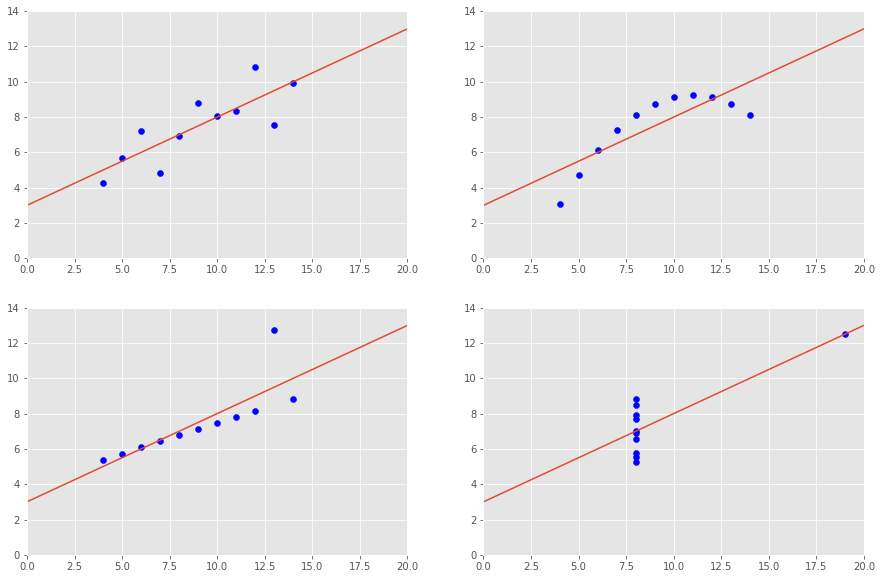

In [13]:
#### xmax = 20
ymax = 14
plt.figure(figsize=(15,10))

ax1 = subplot(2, 2, 1)
scatter(x1, y1,  color='b')
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))


subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x2, y2,  color='b')
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))


subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x3, y3,  color='b')
slope, intercept, r_value, p_value, std_err = linregress(x3, y3)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))


subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4, y4, color='b')
slope, intercept, r_value, p_value, std_err = linregress(x4, y4)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))


axis([0, xmax, 0, ymax])

Right, so now our visualizations tell us a different story - that these datasets now appear to be quite different from each other. They are all explained through same values for mean, standard deviation and regression line, but in reality, the overall distributions are quite different from each other. 

The reasons for similarity we found can be summarized as below:

* The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.

* The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the correlation coefficient is not relevant.

* In the third graph (bottom left), the distribution is linear, but should have a different regression line (different slope, intercept). The calculated slope and intercept are offset by the one outlier which exerts enough influence to lower the correlation coefficient from 1 to 0.816.

* The fourth graph (bottom right) shows an example when one extreme outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.


This classic example really illustrates the importance of looking at your data, not just the summary statistics and model parameters you compute from it.Calculating summary statistics, while useful, should only be one piece of your data analysis pipeline.



>Data visualization is a quick, easy way to convey concepts in a universal manner.


Data scientists use visualization technqiues in order to:

* Visually identify areas that need attention or improvement.
* Clarify which factors influence the desired outcome and how much.
* Help understand and communicate ordering of data entities.
* Show predictions or other outcomes of an analysis. 

Let's see how this phenomenon may manifest itself in real world scenarios.

Let’s look at a real dataset that shows exactly how summary statistics can be dangerous.

A great example is the distribution of starting salaries for new law graduates. The National Association of Law Placement (NALP) reports that in 2012, lawyers made $80,798 on average in starting salary. However a look at the salary distribution shows what law salaries really look like:


![](lawyers.gif)

The visualization above shows that  law graduates usually fall into one of two groups. The majority of new lawyers make somewhere between 35,000 and 75,000 USD per year, and a sizable minority earns 160,000 USD per year. 

What we have here is a "bimodal distribution" i.e. two peaks that arise from two distinct distributions happening within the same dataset. The 80,798 figure reported as the average falls into the trough between the two peaks, and few lawyers have salaries near that number. A much more accurate statement would be: 
>Most law graduates make around 50,000 on average, and those who go to one of the top law schools make $160,000 on average.

There’s also something else happening here that we wouldn’t have observed if we hadn’t plotted the data. There’s a giant spike at exactly 160,000 in starting salary. So, why is 160,000 such a popular number for law salaries? It turns out that this data isn’t based on actual legal salaries, but based on what law schools report to the NALP as their students’ median starting salaries. 

Visualizing the data helped in two ways. It gave us a better picture of what realistic starting law salaries look like, and also allowed us to ask a follow-up question that exposed a potential flaw in our data.

## Which visualization technique to choose ?

Visualizations are based on visual cues like change in color, size, length, volume of graphical objects. The interpretation of these cues maybe considered subjective and all cues are not considered equally revealing. In the paper titled **Graphical Perception and Methods for Analyzing Scientific Data**, researchers Cleveland and McGill came up with some ideas on how human beings precieve different visual cues with varying level of impact. Their paper on the topic is available [HERE](http://courses.ischool.berkeley.edu/i247/f05/readings/Cleveland_GraphicalPerception_Science85.pdf). In summary, a peerceptual heirarchy of visual cues based on this work can be shown as below:


<img src="cues_heirarchy.jpg" alt="drawing" width="300"/>


This hierarchy generally works quite well for continuous variable where a bar chart based on length of bars would always work better than colour intensity or hue in order to highlight the difference between different quantities. But this does not mean that one would ALWAYS use a bar chart. For categorical (nominal and ordinal) variables, difference in Hue and contrast may well prove to be more effective than length. With a focus on how human brains percieve colours, lengths, patterns and shapes, a data visualisation expert would choose different encoding mechanisms to suit the need of underlying data and audience of the visualisation. 

### Selecting Appropriate Visualisation

Following diagram provides a good start for identifying a suitable visualisation type for the given problem. The visual cues shown above can be used for visualizing comparisons and compositions of data elements, in a static as well as a temporal context. It also gives some indication for techniques that might be useful towards showing distributions or random variables. 

![](chart-selector.png)

Bases on this, we shall cover following visualization techniques in the upcoming series of lessons and labs:

* #### Comparisons with Bar Charts
* #### Temporal Comparisons with Line Plots and Area Charts
* #### Compositions with Pie charts and Simple/Multi-level Donut Charts
* #### Univariate statistical relations with box plots, histograms, violin plots etc.
* #### multivariate statistical relationships with scatter plots, heat maps, parallel plots. 


## Summary

This lesson provides a very brief introduction to data visualization. We looked into how different visual cues can be used for depicting data as a graphic. We also looked at how some of the cues might be more effective than others towards visual analysis of data. The chart given in this lesson will be used to cover some of the plotting techniques in Python, Numpy and Pandas in upcoming lessons and labs. 